## California Housing Prices Analysis

In this project I will use Python libraries to analyze a set of data concerning housing prices in the state of California. I will be looking for important factors that contribute to the price of a home and create accompanying visuals to represent these connections.

In [15]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Create a variable to store the housing data
data = pd.read_csv("housing.csv")

The following table shows information gathered from onver twenty thousand home listings in the state of California. Some of the information collected includes median home income, total bedrooms, and proximity to the ocean, among other factors.

In [17]:
# Create a table of the first ten values of the data set
data[:10]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [18]:
# Shows the data type of each variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [19]:
# Removes empty cells from the data set so that we can create a more accurate model
data.dropna(inplace=True)

In [20]:
# Creates a training set from our complete data set 
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [21]:
# Creates a test data set for the creation of a learning model later in the project
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [22]:
train_data = x_train.join(y_train)

The following table is created from 80% of the complete data set. This ratio is important for evaluating an effective machine learning model.

In [23]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
9082,-118.17,34.69,12.0,4881.0,803.0,2188.0,724.0,4.1667,INLAND,171900.0
10720,-117.81,33.63,17.0,4477.0,610.0,1798.0,612.0,8.1093,<1H OCEAN,410400.0
17199,-119.78,34.48,21.0,2377.0,322.0,1007.0,328.0,7.9248,NEAR OCEAN,500001.0
9294,-122.51,38.00,17.0,2449.0,536.0,1157.0,543.0,3.9519,NEAR BAY,274200.0
9336,-122.65,38.01,40.0,1428.0,280.0,708.0,255.0,5.0766,NEAR OCEAN,305400.0
...,...,...,...,...,...,...,...,...,...,...
15711,-122.44,37.79,52.0,2083.0,491.0,1224.0,483.0,4.0882,NEAR BAY,468800.0
16031,-122.45,37.72,46.0,1406.0,235.0,771.0,239.0,4.7143,NEAR BAY,219300.0
4256,-118.35,34.10,18.0,4109.0,1301.0,2103.0,1116.0,2.3250,<1H OCEAN,250000.0
12482,-121.50,38.58,20.0,4018.0,1220.0,1570.0,1122.0,2.5821,INLAND,125000.0


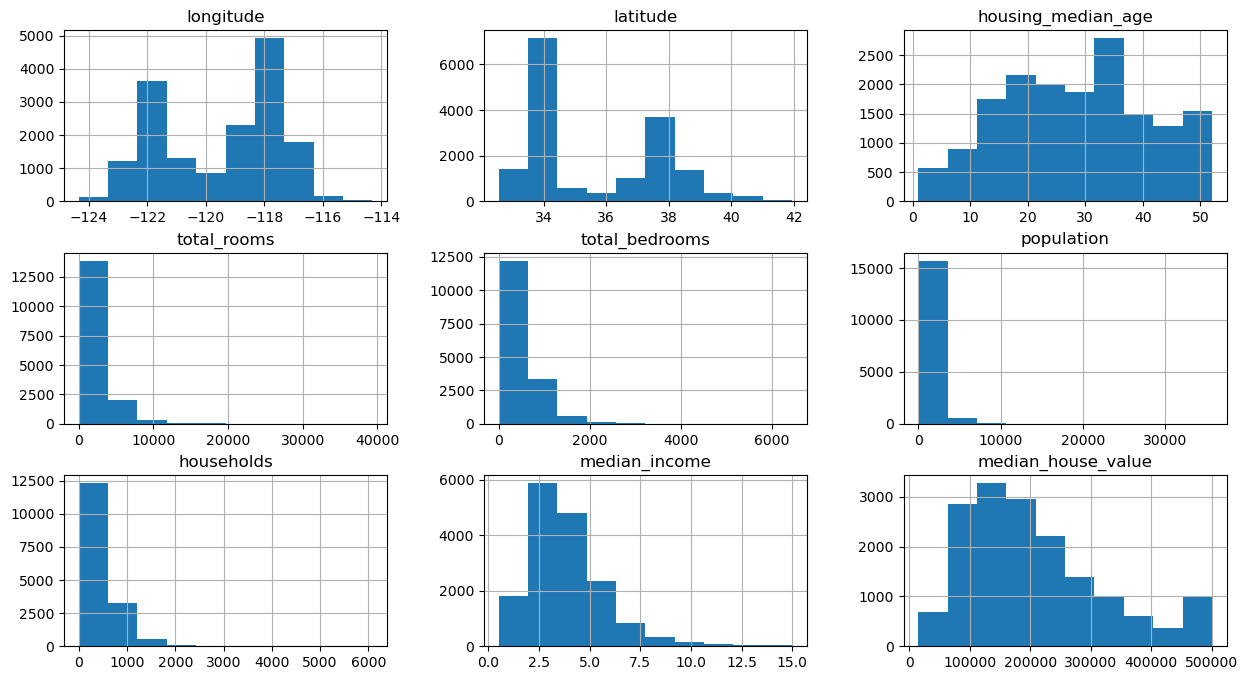

In [24]:
train_data.hist(figsize=(15, 8));

C:\Users\unbou\AppData\Local\Temp\ipykernel_20556\3346828142.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


<Axes: >

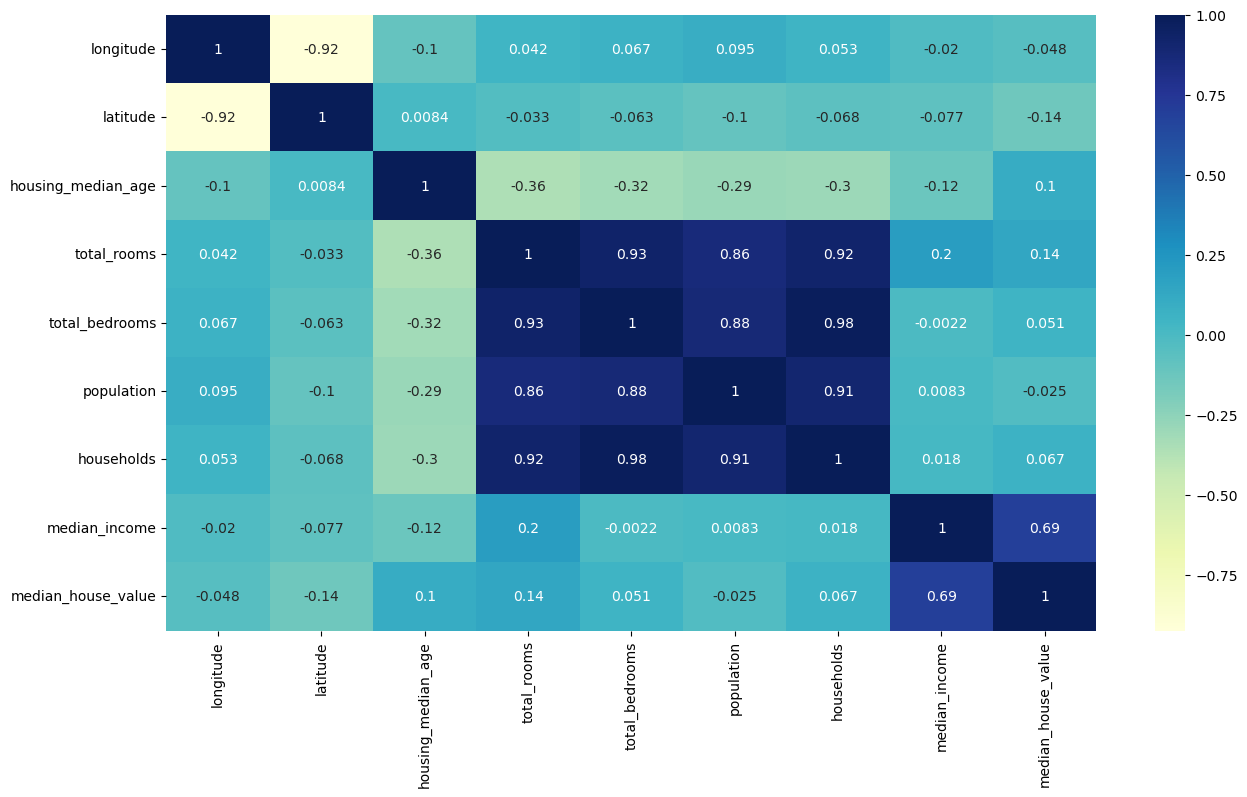

In [25]:
# Creates a heatmap showing correlations between variables.
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [26]:
# Take the log of variables to create more evenly distributed histograms
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

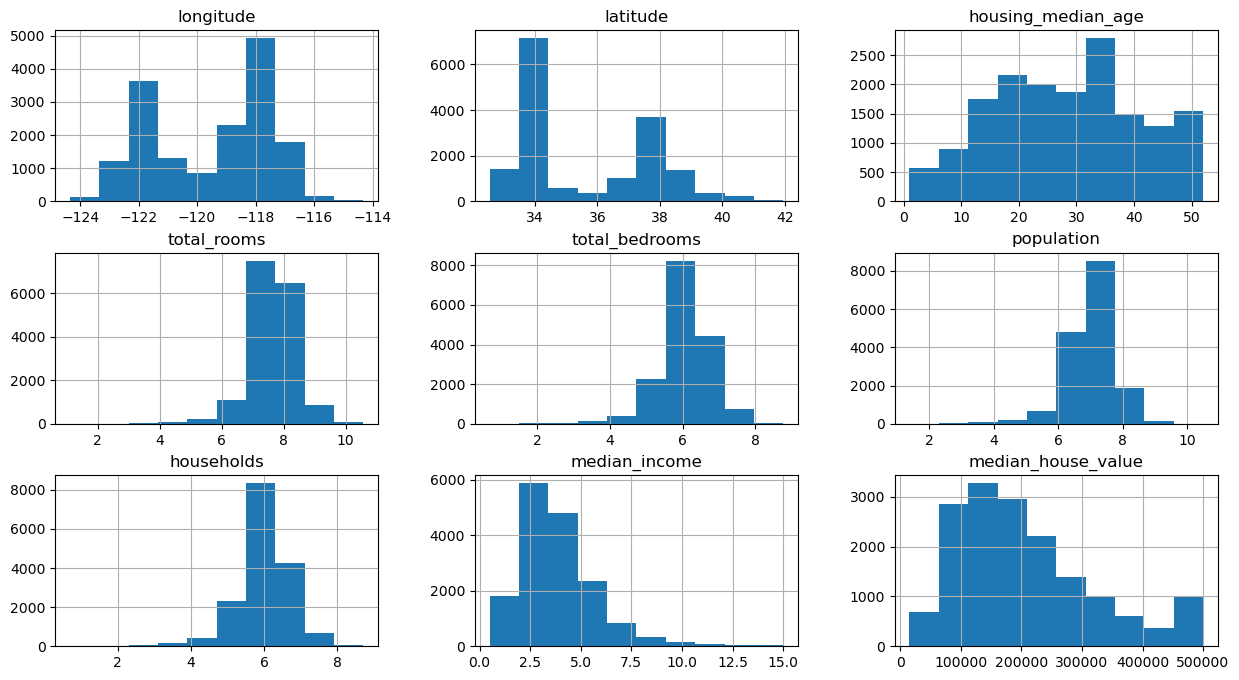

In [27]:
train_data.hist(figsize=(15, 8));

In [28]:
# Gathers counts for the amount of homes in the following posistions in relationship to the proximity of the ocean
train_data.ocean_proximity.value_counts()

<1H OCEAN     7262
INLAND        5187
NEAR OCEAN    2096
NEAR BAY      1797
ISLAND           4
Name: ocean_proximity, dtype: int64

In [29]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

<Axes: >

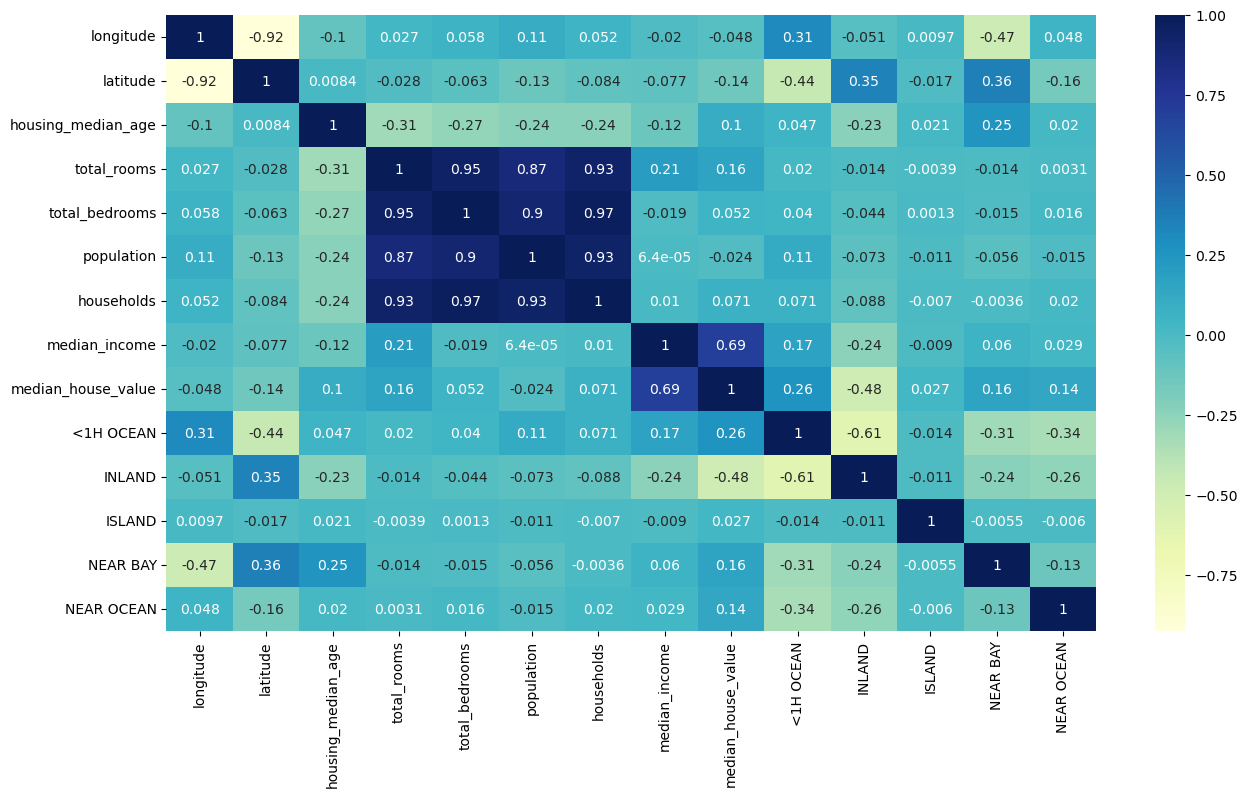

In [30]:
# Creates a heatmap showing correlations with the modified variable of ocean proximity
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

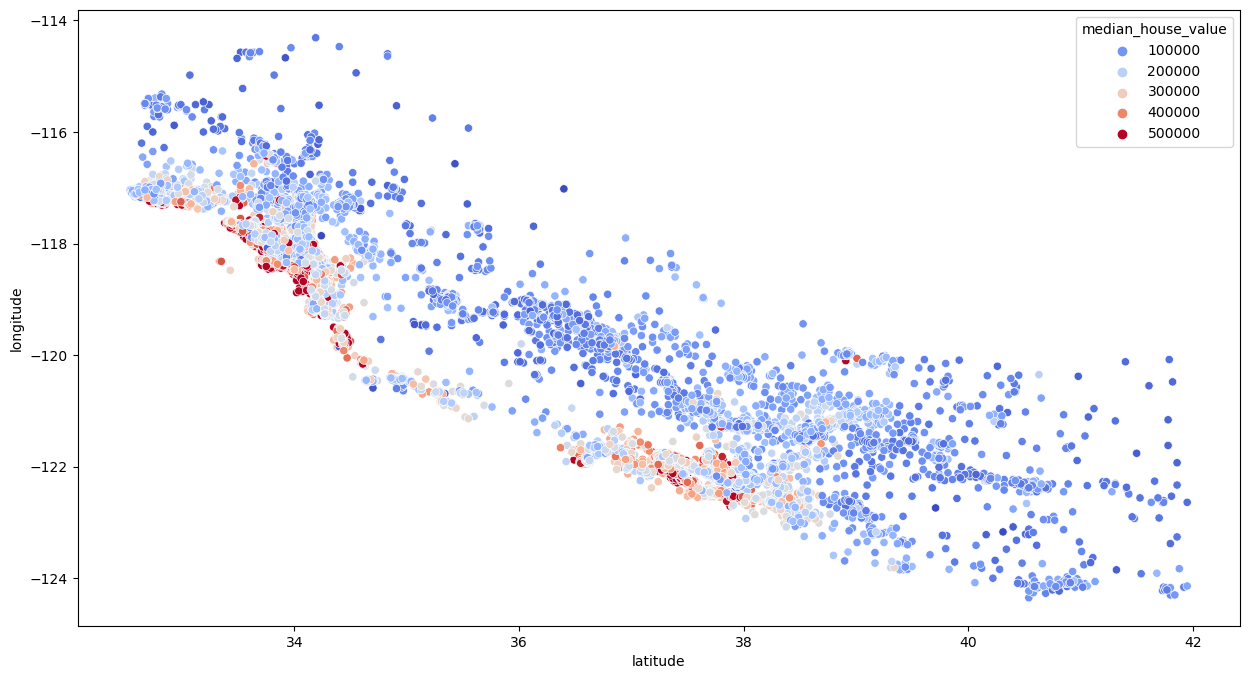

In [21]:
# Plots the posistion of the home and shows higher median home value as warmer colors
# Physically shows the relationship between proximity to the ocean and home value, and interestingly takes the shape 
# of California as well.
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [22]:
# Creates variables to examine the relationship between home value and the number of bedrooms / population of the home
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<AxesSubplot:>

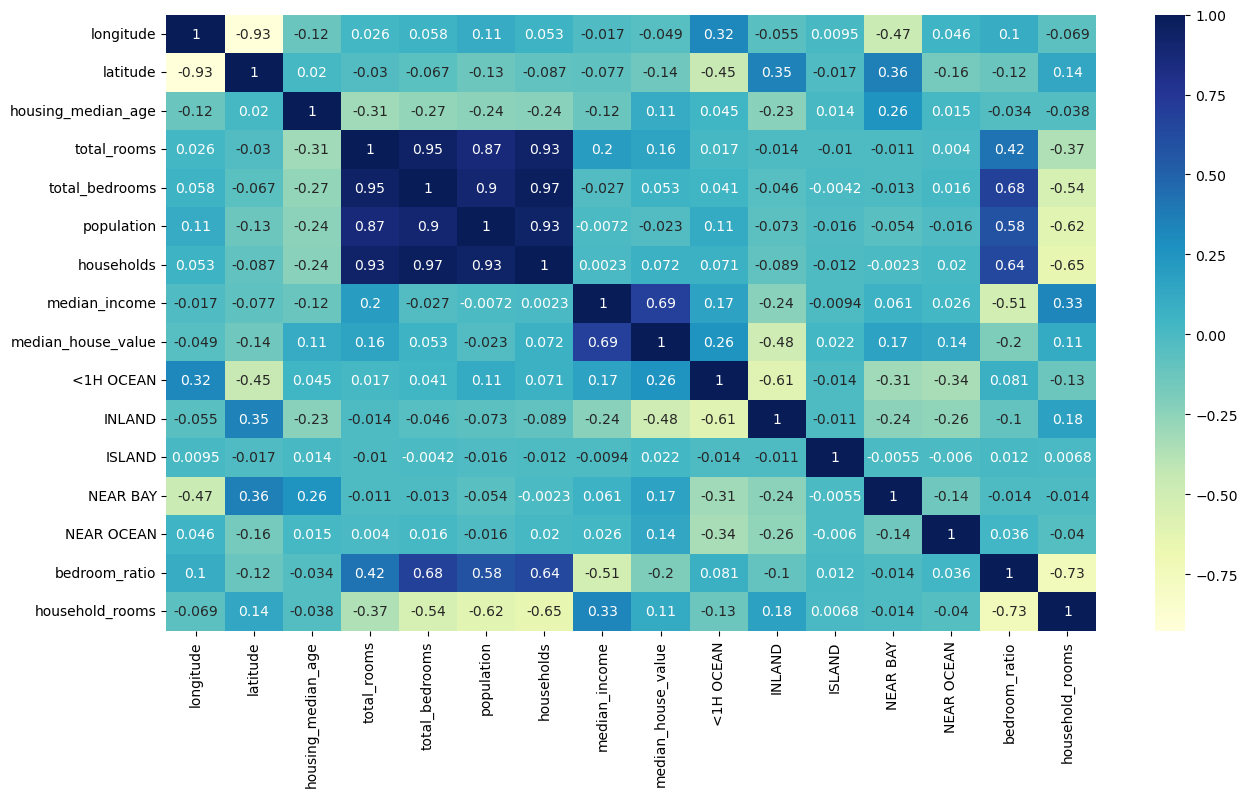

In [23]:
# Another heatmap which shows the newly created variables
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

# Analysis

The most interesting factor in this analysis is proximity to the ocean and median home value. From this data it can be reasonably assumed that the closer one's home to the ocean the greater the value of their home. 

Furthermore, we can also see a high correlation between the median household income and home value. It seems apparent that the more one makes the more the likely they are to purchase a more valuable home. Another interesting factor is the number of people living in the home and the value of said home. We can see that there is a slighly negative correlation between the number of persons living in the home and the value of the home. 

This data is interesting because it shows that there are a great many factors which contribute to the cost of a home. What stands out most prominently as a predictor of home price is location. Thus, if one were looking to invest in real estate, one must consider the location as the single most important factor in calculating their potential return on imvestment. In California, the better locations are in greater proximity to the ocean.

## Learning Model

In [24]:
from sklearn.linear_model import LinearRegression

x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

In [41]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']


In [42]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [45]:
reg.score(x_test, y_test)

0.6551600026048516

In [46]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train, y_train)

RandomForestRegressor()

In [47]:
forest.score(x_test, y_test)

0.8155256157577683

In [48]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [3, 10, 30],
    "max_features": [2, 4, 6, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [49]:
best_forest = grid_search.best_estimator_

In [50]:
best_forest.score(x_test, y_test)

0.8099842157204066